## Lecture 8: The grammar of graphics

### STAT598z: Intro. to computing for statistics


***




### Vinayak Rao

#### Department of Statistics, Purdue University

In [ ]:
options(repr.plot.width=4, repr.plot.height=3)

## Grammar?

A set of rules describing how to compose a 'vocabulary' into permissible 'sentences'

The R language has its own grammar

"Grammar of Graphics" is an abstraction describing how to
create rich and informative plots

*'The Grammar of Graphics'*, Leland Wilkinson

Embodied in the ggplot package for R

*'A Layered Grammar of Graphics'*, Hadlay Wickham, Journal of
Computational and Graphical Statistics, 2010

R’s base graphics supports some plotting commands

E.g. `plot()`, `hist()`, `barplot()`

Extending these standard graphics to custom plots is tedious

`ggplot` is much more flexible, and pretty

Install like you’d install any other package:

```R
install.packages('ggplot2')
library(ggplot2)
```

### Why a grammar?
View different graphs as sharing common structure

Grammar of graphics breaks everything down into a set of
components and rules relating them.

Rather than viewing an images as a 'thing' views it as a sequence of transformations applied to data.

This abstraction avoids
+ limiting yourself to what standard canned packages do
+ hacking through the graphics rendering engine

The components of a graphic are orthogonal:
+ changing one shouldn’t break the others
+ different settings of components are valid (if not sensible)
+ You can build complexity by adding more layers

The grammar represents what we do with the data
+ Plotting is part of understanding rich datasets
+ Having understood the structure of a graph, we might ask: what if we do this instead of that?

### `ggplot`: R implementation of GoG

Components of ggplot ’s grammar of graphics:

One or more layers:
+ Data and aesthetic mappings
+ A statistical transformation
+ A geometric object
+ Position adjustments
+  A scale for each aesthetic
+  A coordinate system
+  A facet specification

###  Plotting in base R

In [1]:
library('ggplot2') 
str(diamonds)  # diamonds is a dataset from ggplot

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


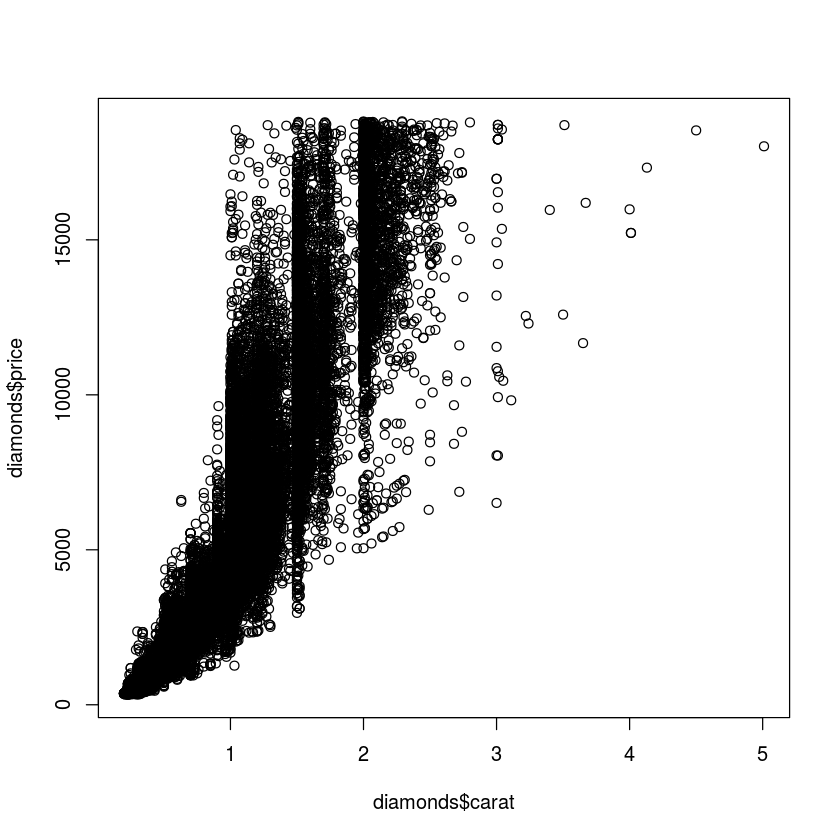

In [2]:
plot(diamonds$carat, diamonds$price)

In [3]:
diamonds_loc <- diamonds[sample(50000,10000),]

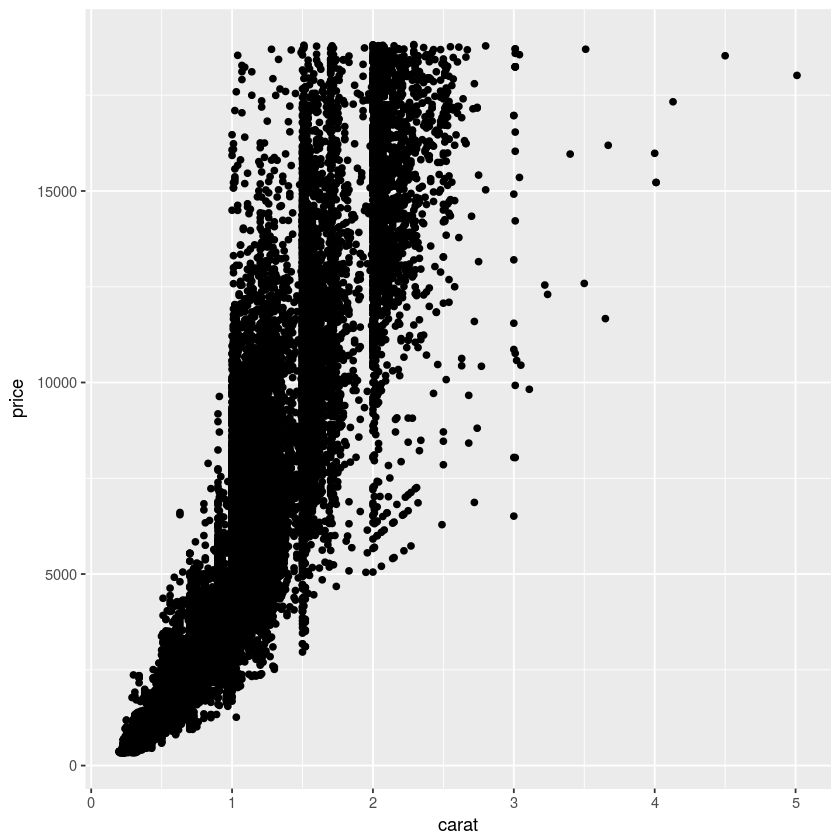

In [4]:
ggplot() +
  layer(
    data = diamonds,
    mapping = aes(x = carat, y = price),
    geom = "point", stat = "identity",
    position = "identity" ) +
  scale_y_continuous() + scale_x_continuous() +
  coord_cartesian() 

Of course, ggplot has intelligent defaults:

In [ ]:
ggplot(diamonds, aes(carat, price)) + geom_point()

There’s also further abbreviations via `qplot` 

(I find this confusing)

## Layers
ggplot produces an object that is rendered into a plot

This object consists of a number of layers

Each layer can get own inputs or share arguments to ggplot()

Add another layer to previous plot:

In [ ]:
ggplot(diamonds, aes(x=carat, y = price)) + geom_point() +
geom_smooth()

## Different layers and their components 
---

### Data and aesthetic mappings:
+ `ggplot` requires a dataframe as input
+ this layer maps columns of input to aspects like x,y-coordinate, size, color etc
+ `reshape2` and `tidyr` packages useful to get data in the right format

In [5]:
mix2norm <- data.frame(x = c(rnorm(1000),rnorm(1000,3)),
                 grp = as.factor(rep(c(1,2),each=1000)))

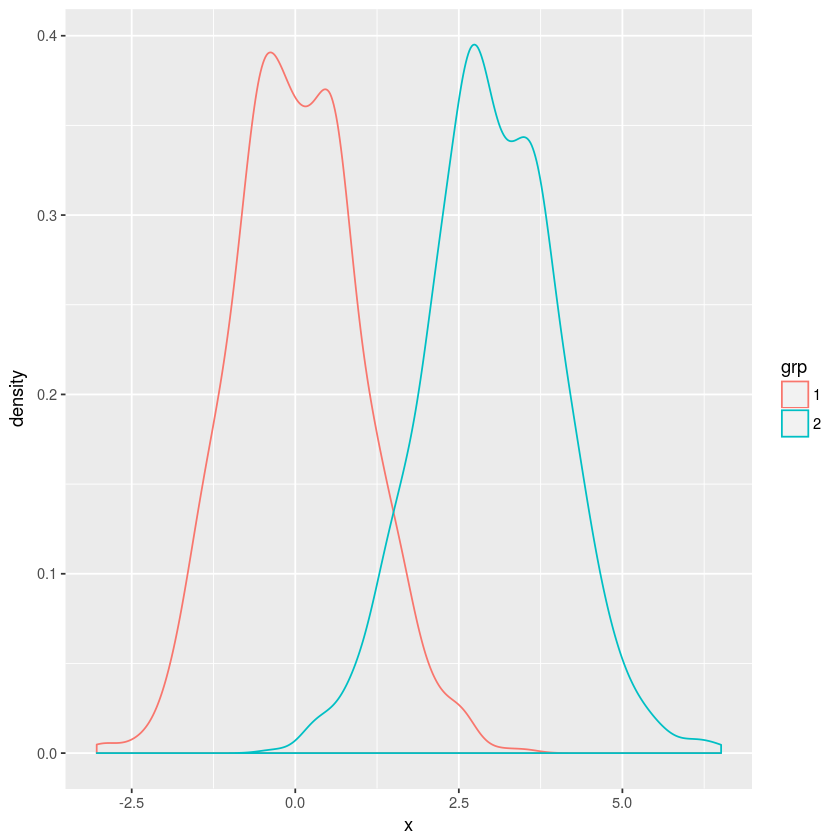

In [8]:
ggplot(mix2norm, aes(x=x, color = grp)) +
    geom_density(adjust=1)

### A statistical transformation

A summarization of the raw input

Example: binning, smoothing, boxplot, identity

Default: often identity (but see previous)

Specified via `stat`


Warning message:
“Ignoring unknown parameters: adjust”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


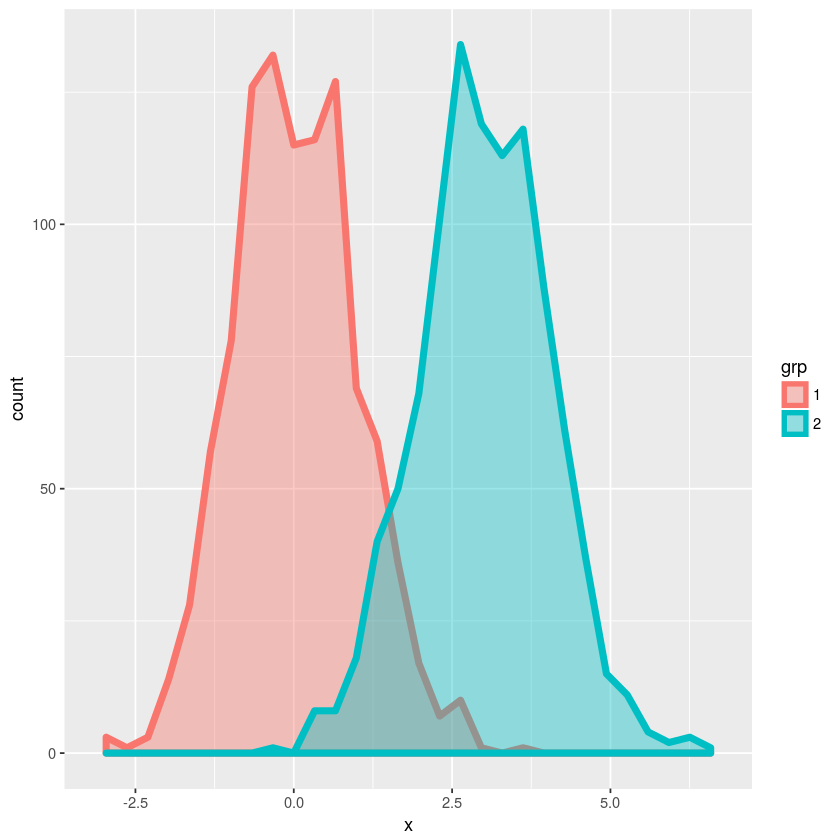

In [11]:
ggplot(mix2norm, aes(x=x, color = grp, fill= grp)) +
geom_density(alpha=.4, adjust=1/2, size=2, stat="bin")

In [ ]:
ggplot(mix2norm, aes(x=x, color = grp, fill= grp)) +
geom_density(alpha=.4, adjust=1/2, size=2, stat="bin") +
scale_color_manual(values = c("1" = "magenta", "2"="blue"))

### A geometric object
The type of plot created

Specified via `geom`
According to dimensionality:
+ 0-dim point, text
+ 1-dim line
+ 2-dim polygon, interval
`geom_density` uses `ribbon`

Others include `geom_hist`, `geom_bar`, `geom_contour`, `geom_line`

Can specify only geometry and not statistical transformation

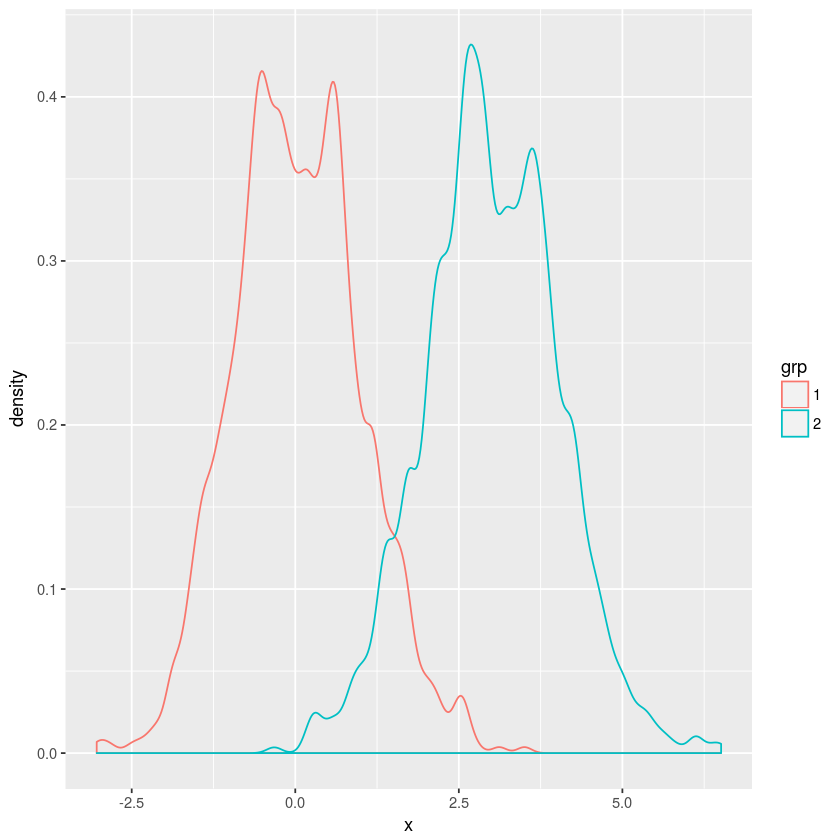

In [12]:
ggplot(mix2norm, aes(x=x, color = grp)) +
geom_density(adjust=1/2)

Can change only statistical transformation but not geometry

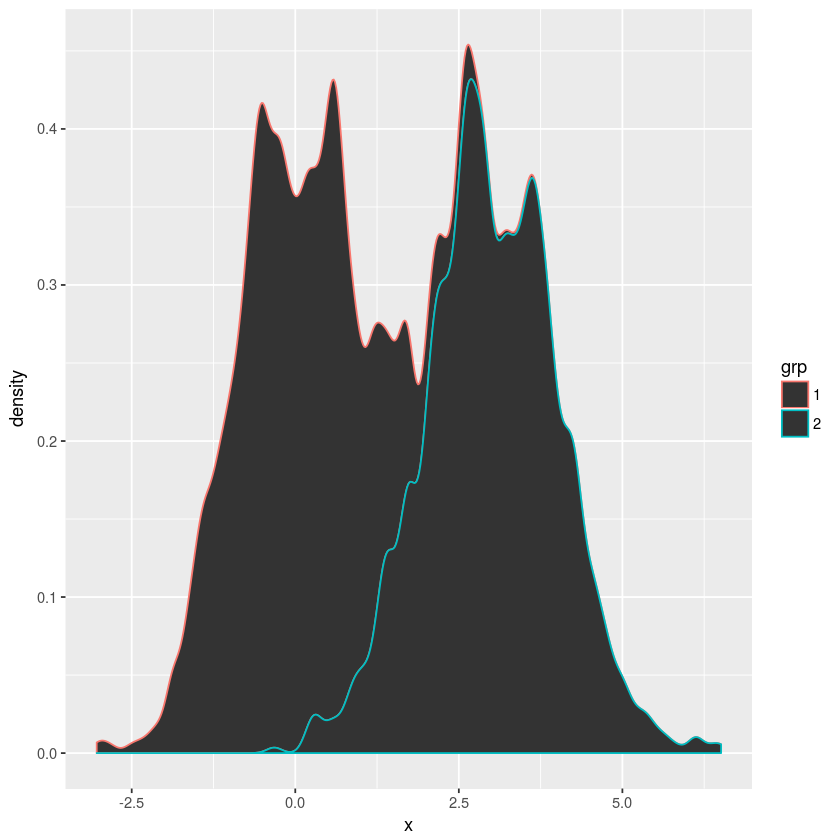

In [13]:
ggplot(mix2norm, aes(x=x, color = grp)) +
stat_density(adjust=1/2)

Why does this look different? What are the defaults for
`position` and `geometry`?

### Position
How different parts of a layer are positioned 
+  identity, dodge, jitter etc.

In [ ]:
ggplot(mix2norm, aes(x=x, color = grp)) +
  stat_density(adjust=1/2, size=2, position = "identity",
  geom = "line")

### Scaling
How each input value maps to the specified aesthetic

+ Specified via `scale`

Continuous, logarithmic, values to shapes, what limits, what
labels, what marks

In [ ]:
ggplot(mix2norm, aes(x=x, color = grp)) +
  stat_density(adjust=1/2, size=2, position = "identity",
  geom = "line") + scale_y_log10(limits = c(1e-5,1))

### Coordinates
How positions of things are mapped to positions on the screen.

Different coordinates can affect the shape of geometric objects

Cartesian, polar, map-projection

In [ ]:
ggplot(mix2norm, aes(x=x, color = grp)) +
  stat_density(adjust=1/2, size=2, position = "identity",
  geom = "line") + coord_polar()

### Facets
Allows arranging different graphs in a grid/panel

In [ ]:
ggplot(mix2norm, aes(x=x, color = grp)) +
  stat_density(adjust=1/2, size=2, position = "identity",
  geom = "line") + facet_grid(grp~.)

### More examples

In [ ]:
ggplot(diamonds, aes(x=carat, y = price,colour=cut)) +
  geom_point() +  
  geom_line(stat= "smooth", method="loess", 
            size=1, alpha= 0.7)

In [ ]:
ggplot(diamonds, aes(x=carat, y = price,colour=cut)) +
geom_point() +
geom_line(stat= "smooth", method=lm, size=1, alpha= 0.7) +
scale_x_log10()+ scale_y_log10()

In [ ]:
ggplot(diamonds, aes(x=carat, fill=cut)) +
geom_histogram(alpha=0.7, binwidth=.4, color="black",
position="dodge") + xlim(0,2)


+ <font size=4px>
“Probably the best statistical graphic ever drawn, this map by Charles Joseph Minard portrays the losses suffered by Napoleon’s army in the Russian campaign of 1812. Beginning at the Polish-Russian border, the thick band shows the size of the army at each position. The path of Napoleon’s retreat from Moscow in the bitterly cold winter is depicted by the dark lower band, which is tied to temperature and time scales.”
Edward Tufte, http://www.edwardtufte.com/tufte/posters </font>

![Alt text](./figures/napmarch_orig.png)

First read the data:

In [ ]:
troops <- read.table("Data/minard-troops.txt", header=T)
cities <- read.table("Data/minard-cities.txt", header=T)
#  options(repr.plot.width=10, repr.plot.height=3)

In [ ]:
plot_troops <- ggplot(troops, aes(long, lat)) +
  geom_path(aes(size = survivors, colour = direction,
  group = group)); 

In [ ]:
plot_both <- plot_troops +
    geom_text(data = cities, aes(label = city), size = 3)
plot_both

In [ ]:
plot_polished <- plot_both + scale_size(
   breaks = c(1, 2, 3) * 10^5, labels = (c(1, 2, 3) * 10^5)) +
   scale_colour_manual(values = c("grey50","red")) +
   xlab(NULL) + ylab(NULL) 
plot_polished

Income dataset: http://www-bcf.usc.edu/~gareth/ISL/data.html

In [ ]:
DataIncm<-read.table("Data/Income2.csv",header=TRUE,sep=",")

In [ ]:
plt1 <- ggplot(DataIncm, aes(x=Education, y = Income)) +
          geom_point(size=2, color="blue") +
          theme(text=element_text(size=15)); plt1

In [ ]:
plt1 <- ggplot(DataIncm, aes(x=Seniority, y = Income)) +
          geom_point(size=2, color="blue") +
          theme(text=element_text(size=15)); plt1

`ggplot` doesn’t support 3d plotting, but:

In [ ]:
plt1 <- ggplot(DataIncm, aes(x=Seniority, y = Income)) +
          geom_point(size=2, color="blue") +
          theme(text=element_text(size=15)); plt1

In [ ]:
ggplot(DataIncm, aes(x=Education, y=Seniority, color=Income)) +
geom_point(size=2) + theme(text=element_text(size=10)) +
scale_color_continuous(low="blue", high="orange") 

### Further reading

*‘A Layered Grammar of Graphics’*, Hadlay Wickham, Journal of
Computational and Graphical Statistics, 2010

ggplot documentation: http://docs.ggplot2.org/current/

Search ‘ggplot’ on Google Images for inspiration

Play around to make your own figures